# Image Segmentation:

**Define Paths for Your Dataset**

In [ ]:
# Define paths to my dataset
train_dir = '/content/drive/My Drive/Processed_Dataset/train/'
valid_dir = '/content/drive/My Drive/Processed_Dataset/valid/'
test_dir = '/content/drive/My Drive/Processed_Dataset/test/'

**Install and Import Required Libraries**

In [ ]:
# Installing OpenCV
!pip install opencv-python

# Import necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


**Load an Image for Segmentation**

Image loaded successfully!


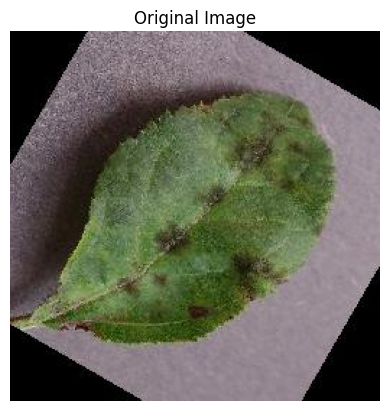

In [ ]:
# Define the path to the 'train' directory
train_dir = '/content/drive/MyDrive/Processed_Dataset/train/'

# Get the list of subfolders (class directories) in the 'train' folder
subfolders = os.listdir(train_dir)

# Select the first subfolder (e.g., the first class)
first_class_dir = os.path.join(train_dir, subfolders[0])

# Get the list of images in the selected class folder
images_in_class = os.listdir(first_class_dir)

# Select the first image in that class folder
image_path = os.path.join(first_class_dir, images_in_class[0])

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Image not found at {image_path}")
else:
    print("Image loaded successfully!")

    # Display the original image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR (OpenCV default) to RGB for displaying
    plt.title("Original Image")
    plt.axis('off')  # Hide axis for cleaner display
    plt.show()



**Convert Image to Grayscale**

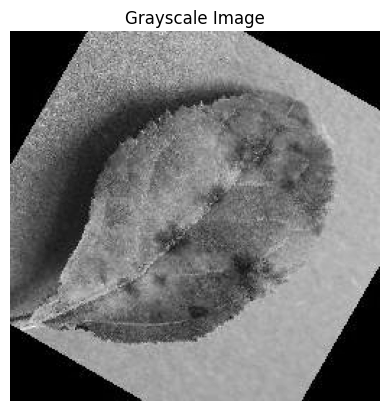

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


**Thresholding for Segmentation**

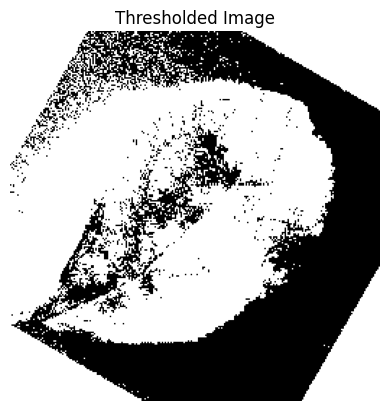

In [ ]:
# Apply thresholding to separate plant from the background
_, thresh_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(thresh_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

**Edge Detection using Canny**

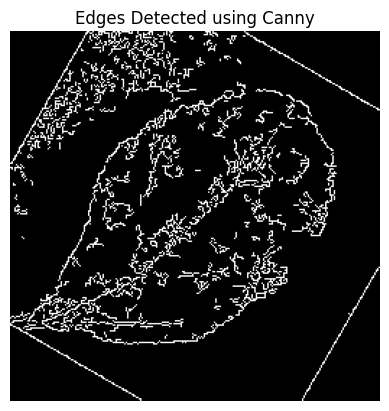

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected using Canny")
plt.axis('off')
plt.show()

**Contour Detection**

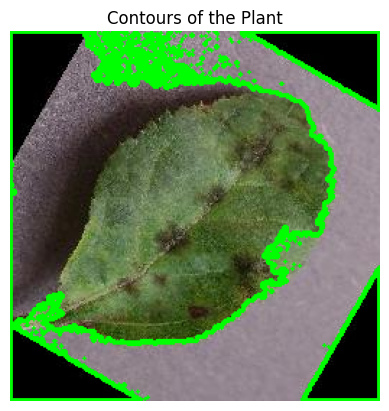

In [ ]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = image.copy()  # Make a copy of the original image to draw contours
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours of the Plant")
plt.axis('off')
plt.show()

**Optimize Segmentation with Morphological Operations**

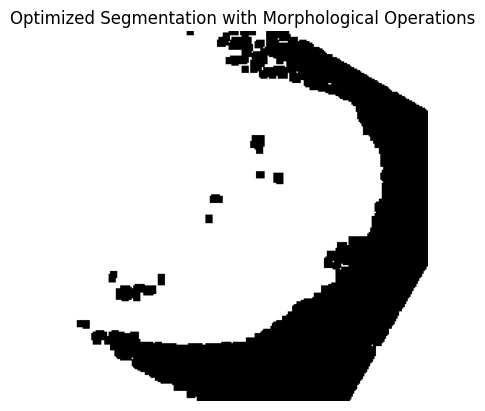

In [ ]:
# Apply morphological operations for refining the segmentation
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)

# Display the morphed image
plt.imshow(morphed_image, cmap='gray')
plt.title("Optimized Segmentation with Morphological Operations")
plt.axis('off')
plt.show()


# Feature Extraction

**Install and Import Required Libraries**

In [ ]:
# Install necessary libraries
!pip install opencv-python pandas
# Install scikit-image
!pip install scikit-image

# Import required libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops


To uninstall skimage library (Beacause I came across a network issue while running above cell(installing)), so I run the above cell again after this cell

In [ ]:
# Uninstall scikit-image to remove any possible conflicting version
!pip uninstall -y scikit-image

Found existing installation: scikit-image 0.24.0
Uninstalling scikit-image-0.24.0:
  Successfully uninstalled scikit-image-0.24.0


*Knowing the version of skimage*

In [ ]:
# Check the version of scikit-image installed
import skimage
print(skimage.__version__)


0.24.0


In [ ]:
# Downgrade to scikit-image 0.19.3 (known to work well with greycomatrix)
!pip install scikit-image==0.19.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires scikit-image>=0.21.0, but you have scikit-image 0.19.3 which is incompatible.


**Define Paths to Dataset**

In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Processed_Dataset/train/'
valid_dir = '/content/drive/MyDrive/Processed_Dataset/valid/'
test_dir = '/content/drive/MyDrive/Processed_Dataset/test/'


**Helper Function: Extract Color Features**

In [ ]:
# Function to extract color features
def extract_color_features(image):
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Compute mean and standard deviation for each color channel
    mean_r = np.mean(image_rgb[:, :, 0])
    mean_g = np.mean(image_rgb[:, :, 1])
    mean_b = np.mean(image_rgb[:, :, 2])

    std_r = np.std(image_rgb[:, :, 0])
    std_g = np.std(image_rgb[:, :, 1])
    std_b = np.std(image_rgb[:, :, 2])

    return [mean_r, mean_g, mean_b, std_r, std_g, std_b]


**Helper Function: Extract Texture Features**

In [ ]:
# Function to extract texture features
def extract_texture_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute GLCM
    glcm = greycomatrix(gray_image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

    # Extract texture features
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]

    return [contrast, dissimilarity, homogeneity, energy, correlation]


**Helper Function: Extract Shape Features**

In [ ]:
# Function to extract shape features
def extract_shape_features(image):
    # Convert image to grayscale and apply thresholding
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour is the plant
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)

        # Compute shape features: area, perimeter
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)

        return [area, perimeter]
    else:
        return [0, 0]  # Default values in case no contour is found


**Extract Features from the Dataset**

In [ ]:
# Function to process images and extract all features
def process_images_and_extract_features(directory):
    features = []

    # Loop over each subfolder (class directory)
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)

        # Loop over each image in the subfolder
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)

            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                continue  # Skip if the image is not loaded properly

            # Extract features
            color_features = extract_color_features(image)
            texture_features = extract_texture_features(image)
            shape_features = extract_shape_features(image)

            # Combine all features into one feature vector
            feature_vector = color_features + texture_features + shape_features
            features.append(feature_vector)

    return features


**Extract Features for Train, Valid, and Test Datasets**

In [ ]:
# Extract features for each dataset
train_features = process_images_and_extract_features(train_dir)
valid_features = process_images_and_extract_features(valid_dir)
test_features = process_images_and_extract_features(test_dir)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

KeyboardInterrupt: 

**Limit the Number of Images for Testing**

In [ ]:
# Limit the number of images for testing
max_images_per_class = 10  # Process only 10 images per class for testing

def process_images_and_extract_features_with_limit(dataset_dir, max_images):
    features = []
    for subfolder in os.listdir(dataset_dir):
        subfolder_path = os.path.join(dataset_dir, subfolder)
        images = os.listdir(subfolder_path)[:max_images]  # Limit the number of images
        for image_name in images:
            image_path = os.path.join(subfolder_path, image_name)
            image_features = extract_features(image_path)  # Your feature extraction function
            features.append(image_features)
    return features

# Process only a few images to test
train_features = process_images_and_extract_features_with_limit(train_dir, max_images_per_class)
valid_features = process_images_and_extract_features_with_limit(valid_dir, max_images_per_class)
test_features = process_images_and_extract_features_with_limit(test_dir, max_images_per_class)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

**Define the extract_features Function**

In [ ]:
# Define a function to extract color, texture, and shape features
def extract_features(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Resize image for consistency
    image = cv2.resize(image, (128, 128))  # Resize to 128x128

    # --- Color Features ---
    # Convert to HSV color space and calculate color histogram
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])

    # Normalize histograms
    hist_hue = cv2.normalize(hist_hue, hist_hue).flatten()
    hist_saturation = cv2.normalize(hist_saturation, hist_saturation).flatten()
    hist_value = cv2.normalize(hist_value, hist_value).flatten()

    # Combine color features
    color_features = np.hstack([hist_hue, hist_saturation, hist_value])

    # --- Texture Features (GLCM) ---
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate GLCM and extract properties
    glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]

    # Combine texture features
    texture_features = [contrast, dissimilarity, homogeneity, energy, correlation]

    # --- Shape Features (Contours) ---
    # Find contours
    _, thresh_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract shape features (area and perimeter of the largest contour)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter = 0

    shape_features = [area, perimeter]

    # Combine all features into a single feature vector
    return np.hstack([color_features, texture_features, shape_features])

# Limit the number of images for testing
max_images_per_class = 10  # Process only 10 images per class for testing

def process_images_and_extract_features_with_limit(dataset_dir, max_images):
    features = []
    for subfolder in os.listdir(dataset_dir):
        subfolder_path = os.path.join(dataset_dir, subfolder)
        images = os.listdir(subfolder_path)[:max_images]  # Limit the number of images
        for image_name in images:
            image_path = os.path.join(subfolder_path, image_name)
            image_features = extract_features(image_path)
            features.append(image_features)
    return features

# Process only a few images to test
train_features = process_images_and_extract_features_with_limit(train_dir, max_images_per_class)
valid_features = process_images_and_extract_features_with_limit(valid_dir, max_images_per_class)
test_features = process_images_and_extract_features_with_limit(test_dir, max_images_per_class)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

**Parallel Processing (Multiprocessing)**

In [ ]:
import multiprocessing as mp

def extract_features_parallel(image_path):
    return extract_features(image_path)  # Your existing feature extraction function

def process_images_parallel(dataset_dir):
    features = []
    with mp.Pool(mp.cpu_count()) as pool:
        for subfolder in os.listdir(dataset_dir):
            subfolder_path = os.path.join(dataset_dir, subfolder)
            images = [os.path.join(subfolder_path, img) for img in os.listdir(subfolder_path)]
            results = pool.map(extract_features_parallel, images)  # Parallel feature extraction
            features.extend(results)
    return features

# Use parallel processing for each dataset
train_features = process_images_parallel(train_dir)
valid_features = process_images_parallel(valid_dir)
test_features = process_images_parallel(test_dir)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1

In [ ]:
# Assuming `features` is a list of feature vectors and `labels` is a list of corresponding labels.
def prepare_features_dataframe(features, labels):
    # Convert the feature list into a DataFrame
    feature_df = pd.DataFrame(features)
    feature_df['label'] = labels  # Add the labels as a column in the DataFrame
    return feature_df

# Example for train, valid, and test
train_df = prepare_features_dataframe(train_features, train_labels)  # You need corresponding labels
valid_df = prepare_features_dataframe(valid_features, valid_labels)
test_df = prepare_features_dataframe(test_features, test_labels)


In [ ]:
def extract_labels(dataset_dir, max_images_per_class):
    labels = []
    for subfolder in os.listdir(dataset_dir):
        subfolder_path = os.path.join(dataset_dir, subfolder)
        images = os.listdir(subfolder_path)[:max_images_per_class]  # Match the number of images being processed
        labels.extend([subfolder] * len(images))  # Assign the folder name as the label for all images in that folder
    return labels

# Generate labels for train, valid, and test sets
train_labels = extract_labels(train_dir, max_images_per_class)
valid_labels = extract_labels(valid_dir, max_images_per_class)
test_labels = extract_labels(test_dir, max_images_per_class)


**Convert features to DataFrame**

In [ ]:
# Convert features and labels to DataFrame
train_df = prepare_features_dataframe(train_features, train_labels)
valid_df = prepare_features_dataframe(valid_features, valid_labels)
test_df = prepare_features_dataframe(test_features, test_labels)

# Print the DataFrame to check if it's correct
print(train_df.head())
print(valid_df.head())
print(test_df.head())


          0         1         2         3         4         5         6  \
0  0.588632  0.000000  0.016023  0.011295  0.006567  0.037824  0.005779   
1  0.008700  0.000000  0.000000  0.001160  0.000870  0.001450  0.002320   
2  0.002771  0.000000  0.000000  0.000000  0.000277  0.000277  0.000277   
3  0.023030  0.000397  0.002780  0.001985  0.002780  0.002780  0.004368   
4  0.002180  0.000000  0.000000  0.000000  0.000000  0.000545  0.000272   

          7         8         9  ...  766  767         768        769  \
0  0.005253  0.020751  0.009456  ...  0.0  0.0  196.454294   7.490342   
1  0.000870  0.004350  0.002320  ...  0.0  0.0  308.223118  10.715121   
2  0.000277  0.000831  0.000554  ...  0.0  0.0  133.607468   7.379122   
3  0.003177  0.004368  0.003177  ...  0.0  0.0   72.529097   5.450357   
4  0.000272  0.000545  0.000000  ...  0.0  0.0  251.411602  10.596395   

        770       771       772      773          774               label  
0  0.262862  0.108623  0.960166   

**Saving features in csv file in Drive**

In [ ]:
# Save the feature DataFrame to CSV for each dataset
train_df.to_csv('/content/drive/MyDrive/Processed_Dataset/train_features.csv', index=False)
valid_df.to_csv('/content/drive/MyDrive/Processed_Dataset/valid_features.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Processed_Dataset/test_features.csv', index=False)


**Features in Descriptive Text**

In [ ]:
# Function to convert features to text form
def convert_features_to_text(features):
    # Assuming the feature order: [avg_R, avg_G, avg_B, contrast, homogeneity, aspect_ratio, area]
    avg_R, avg_G, avg_B = features[:3]
    contrast, homogeneity = features[3:5]
    aspect_ratio, area = features[5:7]

    # Create descriptions for color features
    color_description = f"Color - Avg R: {avg_R:.2f}, Avg G: {avg_G:.2f}, Avg B: {avg_B:.2f}"

    # Create descriptions for texture features
    texture_description = f"Texture - Contrast: {contrast:.2f}, Homogeneity: {homogeneity:.2f}"

    # Create descriptions for shape features
    shape_description = f"Shape - Aspect Ratio: {aspect_ratio:.2f}, Area: {area:.2f}"

    # Combine all descriptions
    feature_text = f"{color_description}; {texture_description}; {shape_description}"

    return feature_text

# Set a limit to print only 10 examples (adjust if needed)
limit = 10

print("Train Features and Labels (Descriptive Text for First 10 Images):\n")
for i in range(min(limit, len(train_features))):
    feature_text = convert_features_to_text(train_features[i])
    print(f"Image {i+1}:")
    print(f"Features: {feature_text}")
    print(f"Label: {train_labels[i]}")
    print("-" * 50)

print("\nValid Features and Labels (Descriptive Text for First 10 Images):\n")
for i in range(min(limit, len(valid_features))):
    feature_text = convert_features_to_text(valid_features[i])
    print(f"Image {i+1}:")
    print(f"Features: {feature_text}")
    print(f"Label: {valid_labels[i]}")
    print("-" * 50)

print("\nTest Features and Labels (Descriptive Text for First 10 Images):\n")
for i in range(min(limit, len(test_features))):
    feature_text = convert_features_to_text(test_features[i])
    print(f"Image {i+1}:")
    print(f"Features: {feature_text}")
    print(f"Label: {test_labels[i]}")
    print("-" * 50)


Train Features and Labels (Descriptive Text for First 10 Images):

Image 1:
Features: Color - Avg R: 0.59, Avg G: 0.00, Avg B: 0.02; Texture - Contrast: 0.01, Homogeneity: 0.01; Shape - Aspect Ratio: 0.04, Area: 0.01
Label: Apple___Apple_scab
--------------------------------------------------
Image 2:
Features: Color - Avg R: 0.01, Avg G: 0.00, Avg B: 0.00; Texture - Contrast: 0.00, Homogeneity: 0.00; Shape - Aspect Ratio: 0.00, Area: 0.00
Label: Apple___Apple_scab
--------------------------------------------------
Image 3:
Features: Color - Avg R: 0.00, Avg G: 0.00, Avg B: 0.00; Texture - Contrast: 0.00, Homogeneity: 0.00; Shape - Aspect Ratio: 0.00, Area: 0.00
Label: Apple___Apple_scab
--------------------------------------------------
Image 4:
Features: Color - Avg R: 0.02, Avg G: 0.00, Avg B: 0.00; Texture - Contrast: 0.00, Homogeneity: 0.00; Shape - Aspect Ratio: 0.00, Area: 0.00
Label: Apple___Apple_scab
--------------------------------------------------
Image 5:
Features: Color 